# Machine learning in Physics: a short guide

Francisco Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

This notebook is related to the paper "Machine Learning in Physics: A Short Guide," published by Europhysics Letters (EPL) in 2023. The pre-print can be downloaded from Arxiv:
https://arxiv.org/abs/2310.10368

Here, we provide a brief introduction to regression, classification, and data clustering using Python libraries.

First, let's import the libraries needed for the analysis.

In [35]:
# Numerical python
import numpy as np

# Data manipulation
import pandas as pd
from pandas import DataFrame

# Data sets
import sklearn.datasets as skdata

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Statistics
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm

# Processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Splitting
from sklearn.model_selection import train_test_split

# Regularization
from sklearn.linear_model import Lasso

# Regression
from sklearn import linear_model

# Model evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

## 1. Linear regression

Linear regression is a technique used to find a relationship between two or more variables. Let's generate the data and perform the regression.

First, let's generate the data. The original model is:$$
y = 5 + 2X_1^2 + 3X_2^2 + \epsilon
$$

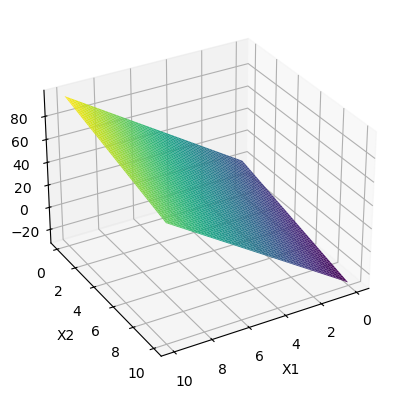

In [36]:
np.random.seed(10)
n = 500 # number of observations
# generate the data
x1 = np.random.uniform(0,10, (n, 1));
x2 = np.random.uniform(0,10, (n, 1));
x3 = np.random.uniform(1,10, (n, 1));
e = np.random.normal(0,5, (n, 1))
y = 5 + 2*x1 + 3*x2 + e

x1_range = np.linspace(min(x1), max(x1), 100)
x2_range = np.linspace(min(x2), max(x2), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Calculate the values in the model considering the whole mesh
y_mesh = 5 * 2*x1_mesh - 3*x2_mesh

# Figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Show the surface
ax.azim = 60  # xz view
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

X = np.hstack((x1,x2,x3,y))
data = pd.DataFrame(X, columns = ['x1', 'x2','x3','y'])

We need to split the data into training and testing sets:

In [37]:
X = np.hstack((x1,x2,x3))
p = 0.3 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [38]:
data_train = pd.DataFrame(np.hstack((x_train,y_train)), columns = ['x1', 'x2','x3','y'])
data_train.head(10)

,x1,x2,x3,y
0,2.247966,8.859203,1.843079,41.245294
1,1.080638,4.190567,8.579855,10.881280
2,7.546477,5.048438,4.877368,44.808772
3,7.217553,2.868907,3.869017,25.011682
4,4.806883,7.389259,8.534944,37.033195
5,9.075429,8.310450,6.115551,49.259015
6,7.488039,0.614311,6.635119,14.660840
7,1.846268,6.639989,7.465133,26.198767
8,5.220496,0.946164,6.764142,13.259482
9,5.973716,1.132531,6.924993,21.369190


In [39]:
# adding the constant term
x_train = sm.add_constant(x_train)
 
# performing the regression
# and fitting the model
model = sm.OLS(y_train, x_train).fit()
 
# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     651.3
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          6.56e-142
Time:                        17:03:48   Log-Likelihood:                -1053.0
No. Observations:                 350   AIC:                             2114.
Df Residuals:                     346   BIC:                             2129.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6548      0.843      5.520      0.0

Notice that we generated data with two variables ($X_1$ and $X_2$), while our model has three variables. The linear regression assigned a zero weight to this third variable, as expected. Additionally, the p-value associated with this variable is large, indicating it is not significant.

After adjusting the model, we can evaluate it on the test set:

In [40]:
x_test = sm.add_constant(x_test)
y_pred = model.predict(x_test)

print(r2_score(y_test, y_pred))

0.8368896891017935


We can plot the data against the predicted values. The dotted line represents a perfect prediction. The closer the points are to this line, the better the prediction.

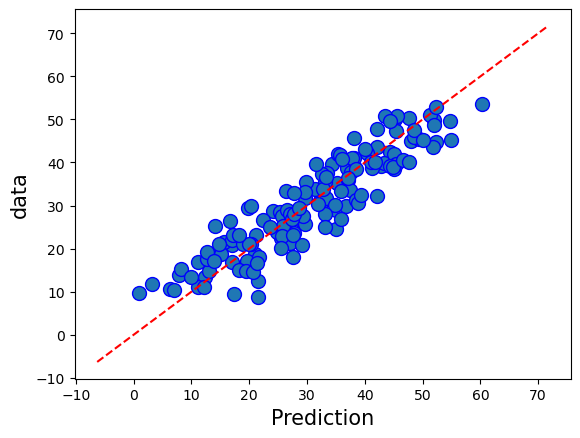

In [41]:
fig = plt.figure()
l = plt.plot(y_test, y_pred, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("data", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(np.min(y), 1.2*np.max(y),(np.max(y)-np.min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

## 1.1 Diagnosis

The residuals, which are the differences between the predicted values and the actual data points, should have a normal distribution. We can verify this with the following histogram.

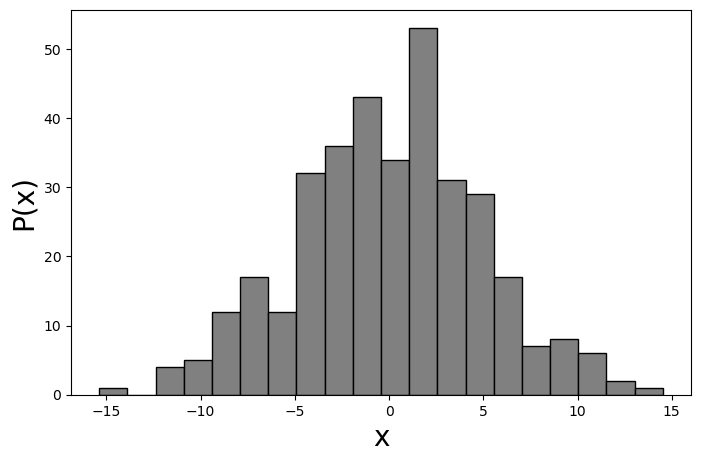

In [42]:
plt.figure(figsize=(8,5))
residuals = model.resid

plt.hist(residuals, bins=20, color = 'gray', histtype='bar', ec='black')  
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.show(True)

The quantile-quantile plot (Q-Q plot) can also be used to verify if a distribution follows a normal distribution. In a Q-Q plot of normally distributed data, the points should generally fall along a straight line, although deviations may occur at the ends.

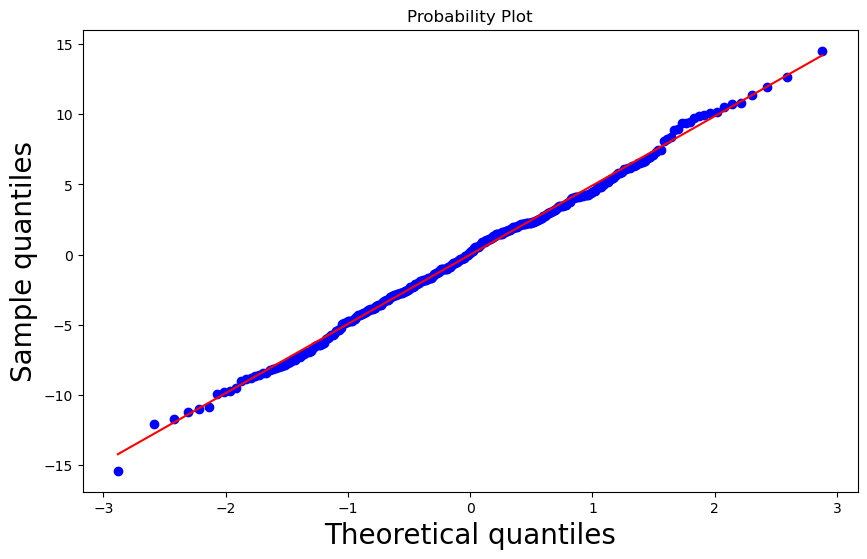

In [43]:
plt.figure(figsize=(10,6))
stats.probplot(np.sort(residuals), dist="norm",plot=plt)
plt.xlabel('Theoretical quantiles', fontsize = 20)
plt.ylabel('Sample quantiles',fontsize = 20)
plt.show(True)

By plotting the predicted values in random order, we can verify if they are independent from each other, as we assumed that $\langle \epsilon_i \epsilon_j \rangle = 0$, for $i, j = 1, 2, \ldots, n$.

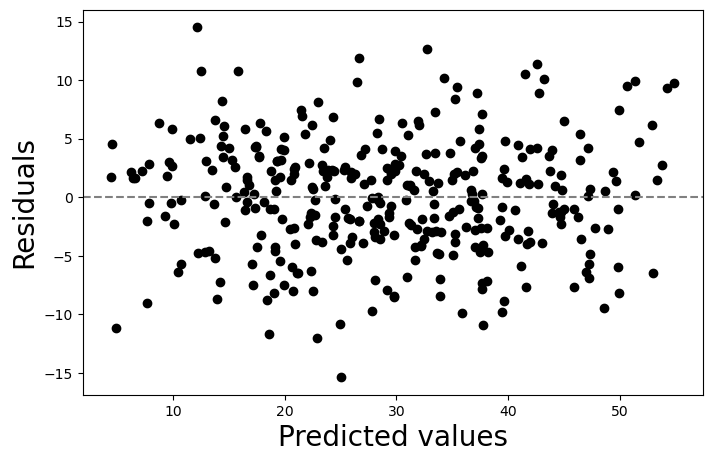

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(model.fittedvalues, residuals,color='black')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.xlabel('Predicted values',fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.show(True)

## 1.2 Overfitting and regularization

First, let us generate an artificial dataset: $y_i = \cos(2 \pi x) + \epsilon_i$, where $\langle \epsilon_i \rangle = 0$ and $\langle \epsilon_i  \epsilon_j\rangle = 0$, for $i,j = 1,2,\ldots, n$.

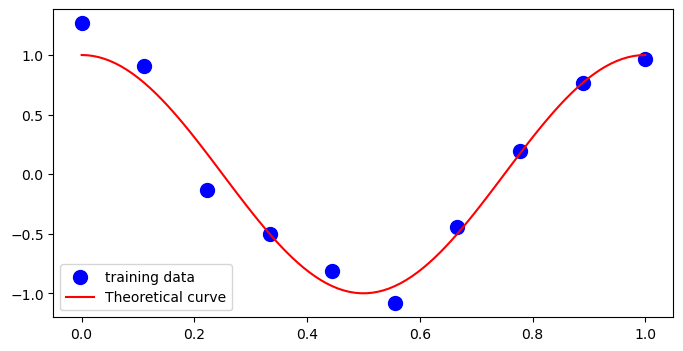

In [45]:
np.random.seed(10)

#função para gerar os dados
def function(x):
    y = np.cos(2 * np.pi * x)
    return y

# training set
N_train = 10
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=10)
plt.show(True)

Note that we only have access to the data points. The red curve is unknown.

Let us adjust a polinomial of degree $M$ to the data points (in blue):
$$
f(x,\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_M x^M
$$
First, we consider $M=1$, that is, a linear fitting:
$$
f(x,\theta) = \theta_0 + \theta_1 x 
$$

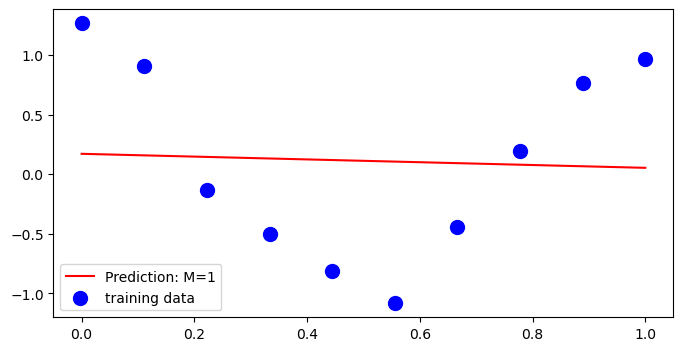

In [46]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Prediction: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=10)
plt.show(True)

As we can see, the model is overly simplistic. Let us consider $M=3$:

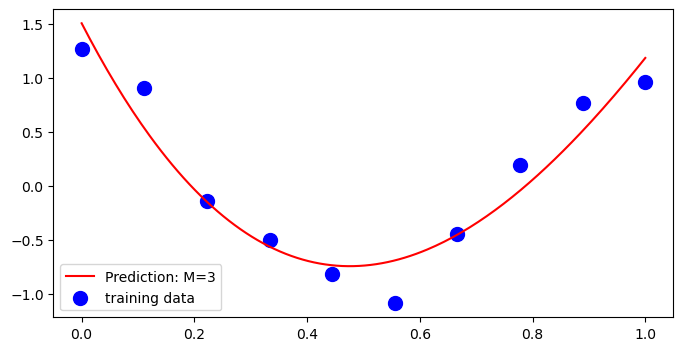

In [47]:
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train) 
model = linear_model.LinearRegression()
model.fit(X,y_train)
Xplot=poly3.fit_transform(xplot)

y_pred_train = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, y_pred_train, label='Prediction: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=10)
plt.show(True)

If we consider a polynomial of degree $M=9$, we can observe that the curve fits the points perfectly, with no error.

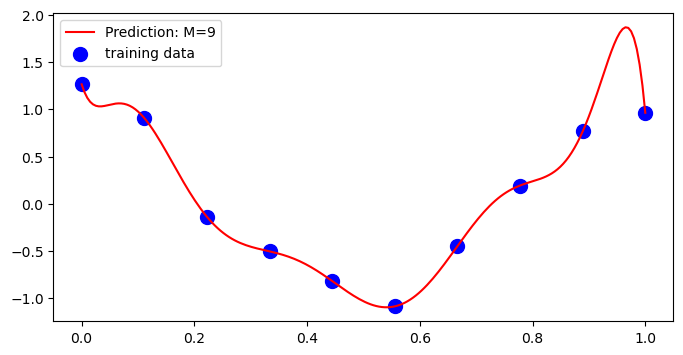

In [48]:
poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
y_pred_train = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, y_pred_train, label='Prediction: M=9', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=10)
plt.show(True)

However, when we apply the adjusted model to the test set, we observe that for small and large values of $M$, the error is higher. There exists an intermediate value of $M$ for which the fit is the best.

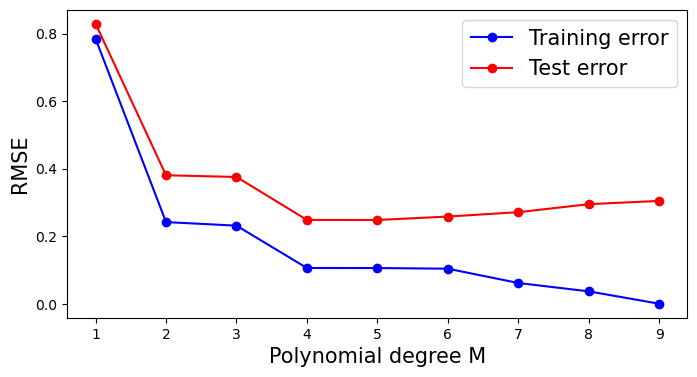

In [49]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Polynomial degree M", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Therefore, for $M=4$, we observe the smallest difference between the error in the training and test sets. For $M>4$, we can see that the error in the test set increases, while in the training set, it approaches zero. This is indicative of overfitting. Thus, when overfitting occurs, the model performs well on the training set but fails to accurately predict values in the test set.

To avoid overfitting, we can collect more data or use regularization. There are several methods for regularization, and a popular one is called Lasso (Least Absolute Shrinkage and Selection Operator).

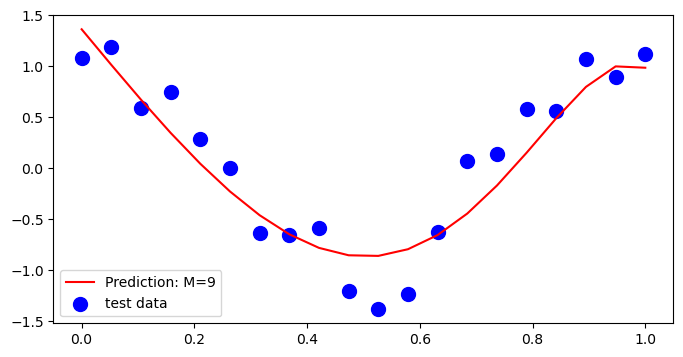

In [50]:
poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = Lasso(alpha = 0.001, max_iter=1200000)
model.fit(X,y_train)
Xt = poly9.fit_transform(x_test)
y_pred = model.predict(Xt)

fig = plt.figure(figsize=(8, 4))
plt.plot(x_test, y_pred, label='Prediction: M=9', color = 'red')
plt.scatter(x_test, y_test, facecolor="blue", edgecolor="b", s=100, label="test data")
plt.legend(fontsize=10)
plt.show(True)

In [51]:
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME) 

R2 = r2_score(y_test, y_pred)
print('R2:', R2)

RSME: 0.0850059079244199
R2: 0.8756579719015471


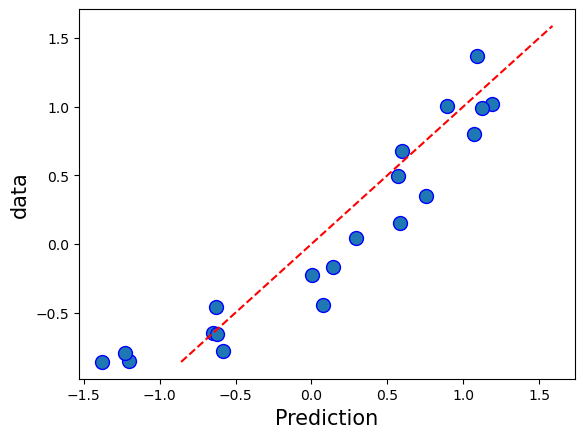

In [52]:
fig = plt.figure()
l = plt.plot(y_test, y_pred, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("data", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_pred), 1.2*max(y_pred),(max(y_pred)-min(y_pred))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Therefore, regularization serves as an effective technique for mitigating overfitting, offering a means to constrain model complexity and improve generalization performance

## 2. Classification

When the output of a supervised learning method is a class rather than a real number, we encounter a classification problem. Let's explore this with the example of classifying vehicles based on their properties.

In [53]:
data = pd.read_csv('data/vehicles.csv', header=(0))
features_names = data.columns
data.head(10)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Let's convert the data to NumPy to facilitate manipulation.

In [54]:
data = data.dropna(axis='rows') #remove NaN
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecting the training and test sets:

In [55]:
p = 0.8 # fraction of elements in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)

Standardization is often necessary for many methods. Let's transform the data to ensure features have zero mean and unit standard deviation.

In [56]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Next, we can perform classification using the logistic regression method.

In [23]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy: ', model.score(X_test, y_test))

Accuracy:  0.8294117647058824


The confusion matrix can provide additional insights into the classification.

In [24]:
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,bus,opel,saab,van,All
True,,,,,
bus,44,0,1,1,46
opel,1,30,9,0,40
saab,3,12,28,1,44
van,0,1,0,39,40
All,48,43,38,41,170


We can perform classification using other methods such as Naive Bayes, SVM, decision trees, and neural networks. Let's consider the random forest algorithm.

In [25]:
# Hiperparameters
model=RandomForestClassifier(n_estimators=100, bootstrap=True, 
                             class_weight=None, criterion='gini')
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7352941176470589


In [26]:
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,bus,opel,saab,van,All
True,,,,,
bus,46,0,0,0,46
opel,0,24,15,1,40
saab,0,22,19,3,44
van,1,2,1,36,40
All,47,48,35,40,170


Random forests also enable the determination of the importance of each attribute to the classification.

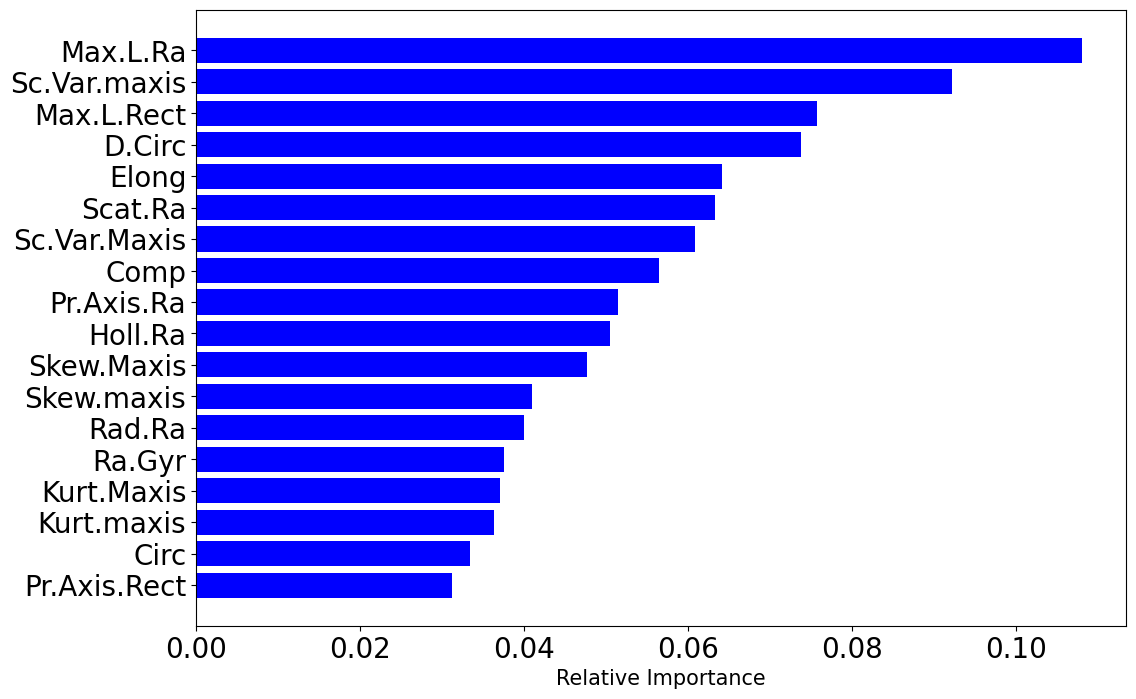

In [27]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

### 2.1 Binary classification

When dealing with two classes, binary classification is applicable. A highly suitable method for this is logistic regression. Let's generate artificial data to illustrate this.

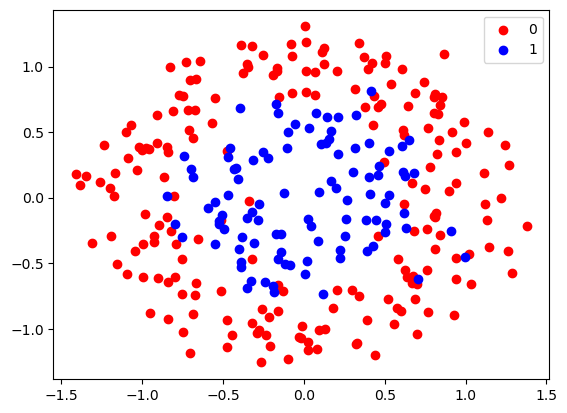

In [28]:
# generate 2d classification dataset
n_samples = (200, 100)
#X, y = skdata.make_moons(n_samples=n_samples, noise=0.6)
X, y = skdata.make_circles(n_samples=n_samples, factor=.5,noise=0.2)

d = np.column_stack((X,np.transpose(y)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

Converting to numpy.

In [29]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecting the training and test sets.

In [30]:
p = 0.2 # fraction of elements in the test set
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X, y, test_size = p, random_state = 2)

Performing the standardization.

In [31]:
scaler = StandardScaler().fit(X_train_out)
X_train_out = scaler.transform(X_train_out)
X_test_out = scaler.transform(X_test_out)

Now we can use the k-nearest neighbors classifier to determine the optimal number of neighbors.

Melhor k: 14  AUC: 0.9028341799239634


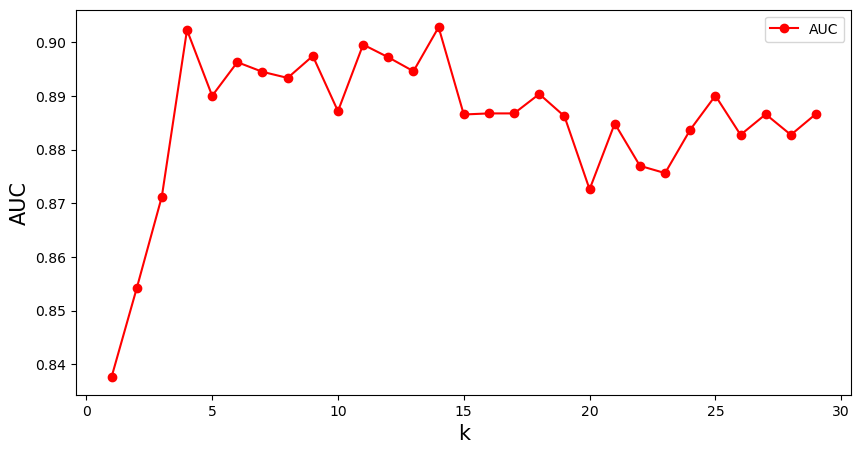

In [32]:
kfolds = 5
cv = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=1)
vk = []
mscore = []
for k in range(1, 30):
    vscore = []
    for train_index, test_index in cv.split(X_train_out, y_train_out):
        # select rows
        x_train, x_test = X_train_out[train_index], X_train_out[test_index]
        y_train, y_test = y_train_out[train_index], y_train_out[test_index]
        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        area_auc = roc_auc_score(y_pred, y_test)
        vscore.append(area_auc)
    mscore.append(np.mean(vscore))
    vk.append(k)
best_k = np.argmax(mscore)+1
print('Melhor k:', best_k, ' AUC:',mscore[best_k-1])
plt.figure(figsize=(10,5))
plt.plot(vk, mscore, '-ro', label= 'AUC')
plt.xlabel('k', fontsize = 15)
plt.ylabel('AUC', fontsize = 15)
plt.legend()
plt.show()

Finally, we train the model again and perform binary classification.

In [33]:
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(X_train_out,y_train_out)
y_pred = model.predict(X_test_out) 
score = roc_auc_score(y_pred, y_test_out)
print('AUC:', score)

AUC: 0.8639281129653402


We can also consider other metrics to evaluate the classification.

In [34]:
print('Accuracy:', accuracy_score(y_test_out, y_pred))
print('F1 score:', f1_score(y_test_out, y_pred, average="macro"))
print('Precision:', precision_score(y_test_out, y_pred, average="macro"))
print('Recall:', recall_score(y_test_out, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test_out, y_pred))

Accuracy: 0.8333333333333334
F1 score: 0.8237367802585194
Precision: 0.8639281129653402
Recall: 0.8181818181818181

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        33
         1.0       0.95      0.67      0.78        27

    accuracy                           0.83        60
   macro avg       0.86      0.82      0.82        60
weighted avg       0.86      0.83      0.83        60



## 3. Additional materials

There are many tutorials, papers and books on the web where we can learn about machine learning. Here are some useful links:

1 - Neural networks: 
* Book: Understanding Deep Learning - https://udlbook.github.io/udlbook/
* Pytorch: https://pytorch.org/tutorials/
* Keras: https://keras.io/
* scikit-learn: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

2 - Time series:
* Book: Forecasting: Principles and Practice - https://otexts.com/fpp3/
* Darts: https://unit8co.github.io/darts/
* PyTorch Forecasting: https://github.com/jdb78/pytorch-forecasting
* Prophet: https://facebook.github.io/prophet/
* Auto_TS: https://github.com/AutoViML/Auto_TS
* ETNA: https://github.com/tinkoff-ai/etna
* Kats: https://github.com/facebookresearch/Kats
* Merlion: https://github.com/salesforce/Merlion
* Pycaret: https://github.com/pycaret/pycaret
* Sktime:https://github.com/sktime/sktime

3 - Imbalanced Data:
* Paper: Learning from Imbalanced Data - https://lnkd.in/dMPp-kGj
* imbalanced-learn https://lnkd.in/d_pHc5hB

4 - Physics informed machine learing:
* Paper: Physics-informed machine learning - https://www.nature.com/articles/s42254-021-00314-5
* Tutorial: https://i-systems.github.io/tutorial/KSNVE/220525/01_PINN.html

5 - Graph neural networks:
* Book: Graph Representation Learning - https://www.cs.mcgill.ca/~wlh/grl_book/
* Tutorial: https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial7/GNN_overview.ipynb

6 - Symbolic regression:
* Paper: Interpretable scientific discovery with symbolic regression: a review - https://link.springer.com/article/10.1007/s10462-023-10622-0
* Tutorial: https://gplearn.readthedocs.io/en/stable/intro.html

7 - Fundamental papers:
* 1 - What are the most important statistical ideas of the past 50 years?, Gelman et al, Journal of the American Statistical, 2021
https://lnkd.in/dDGZFBQ3 
* 2 - Statistical modeling: The two cultures, L Breiman - Statistical science, 2001
https://lnkd.in/dG7FJhp2
* 3 - The Deluge of Spurious Correlations in Big Data, CS Calude, G Longo, Foundations of science, 2017
https://lnkd.in/da7UegyF
* 4 - Statistical tests, P values, confidence intervals, and power: a guide to misinterpretations, Greenland et al., European journal of epidemiology, 2016
https://lnkd.in/dMKXvVZd
* 5 - A few useful things to know about machine learning, P. Domingos, Communications of the ACM, 2012
https://lnkd.in/dM567qci
* 6 - Bootstrap Confidence Intervals, T. J. DiCiccio and B. Efron, Statistical Science, 1996
https://lnkd.in/du2VX9zR
* 7 - Understanding neural networks as statistical tools, Warner and Misra, The american statistician, 1996
https://lnkd.in/dSrXGXeU
* 8 - A high-bias, low-variance introduction to Machine Learning for physicists, Mehta et al, Physics Reports, 20190627
https://lnkd.in/dFBuFe3
* 9 - Principal component analysis: A natural approach to data exploration, Silva et al, ACM Computing Surveys, 2021.
https://lnkd.in/dn7DSjt
* 10 - Bayesian statistics and modelling, Rens van de Schoot et al., Nature Reviews, 2021.
https://lnkd.in/dHPdXMka
* 11 - Machine learning and the physical sciences, Carleo et al., Rev. Mod. Phys, 2019. https://link.aps.org/doi/10.1103/RevModPhys.91.045002

<hr>